# Data Analysis Projest Life Cycle
- **Business Problem Understanding**
- **Data Collection**
- **Data Pre-processing**
- **Exploratory Data Analysis**
- **Reporting**

## Business Problem
**Client wants us to analyze diwali sales data in order to understand the trend, insights, top performing products, categories, zones so that they can prepare better to improve sales**

## Data Collection
- Client has provided historial data in csv file
- Link: https://drive.google.com/file/d/1mGY1doT8RRTgIS0eZsiexHOjUIel9pvo/view?usp=drive_link

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv(r"C:\Users\arpan\Downloads\Diwali Sales Data.csv", encoding ='unicode_escape')

In [4]:
data.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903.0,Sanskriti,P00125942,F,26-35,28,0.0,Maharashtra,Western,Healthcare,Auto,1.0,23952,NaN,NaN
1,1000732.0,Kartik,P00110942,F,26-35,35,1.0,Andhra Pradesh,Southern,Govt,Auto,3.0,23934,NaN,NaN
2,1001990.0,Bindu,P00118542,F,26-35,35,1.0,Uttar Pradesh,Central,Automobile,Auto,3.0,23924,NaN,NaN
3,1001425.0,Sudevi,P00237842,M,0-17,16,0.0,Karnataka,Southern,Construction,Auto,2.0,23912,NaN,NaN
4,1000588.0,Joni,P00057942,M,26-35,28,1.0,Gujarat,Western,Food Processing,Auto,2.0,23877,NaN,NaN


In [5]:
df=data.copy()

In [6]:
df.shape

(11345, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11345 entries, 0 to 11344
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11321 non-null  float64
 1   Cust_name         11344 non-null  object 
 2   Product_ID        11341 non-null  object 
 3   Gender            11341 non-null  object 
 4   Age Group         11339 non-null  object 
 5   Age               11334 non-null  object 
 6   Marital_Status    11339 non-null  float64
 7   State             11332 non-null  object 
 8   Zone              11334 non-null  object 
 9   Occupation        11339 non-null  object 
 10  Product_Category  11334 non-null  object 
 11  Orders            11342 non-null  float64
 12  Amount            11331 non-null  object 
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(5), object(10)
memory usage: 1.3+ MB


In [8]:
# null value
null_value = df.isna().sum()
null_value

User_ID                24
Cust_name               1
Product_ID              4
Gender                  4
Age Group               6
Age                    11
Marital_Status          6
State                  13
Zone                   11
Occupation              6
Product_Category       11
Orders                  3
Amount                 14
Status              11345
unnamed1            11345
dtype: int64

In [9]:
null_value_percentage = (df.isna().sum()/(df.shape[0]))*100
null_value_percentage

User_ID               0.211547
Cust_name             0.008814
Product_ID            0.035258
Gender                0.035258
Age Group             0.052887
Age                   0.096959
Marital_Status        0.052887
State                 0.114588
Zone                  0.096959
Occupation            0.052887
Product_Category      0.096959
Orders                0.026443
Amount                0.123402
Status              100.000000
unnamed1            100.000000
dtype: float64

In [10]:
pd.concat([null_value, null_value_percentage], axis =1)

,0,1
User_ID,24,0.211547
Cust_name,1,0.008814
Product_ID,4,0.035258
Gender,4,0.035258
Age Group,6,0.052887
Age,11,0.096959
Marital_Status,6,0.052887
State,13,0.114588
Zone,11,0.096959
Occupation,6,0.052887


In [11]:
# all columns
all_columns = df.columns
all_columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

In [12]:
#numeric columns
numeric_columns = df.select_dtypes(include = np.number).columns
numeric_columns

Index(['User_ID', 'Marital_Status', 'Orders', 'Status', 'unnamed1'], dtype='object')

In [13]:
# non numeric columns
non_numeric_columns = df.select_dtypes(include = object).columns
non_numeric_columns

Index(['Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age', 'State',
       'Zone', 'Occupation', 'Product_Category', 'Amount'],
      dtype='object')

In [14]:
#duplicated value
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
11340    False
11341    False
11342    False
11343     True
11344    False
Length: 11345, dtype: bool

In [15]:
# filtering out the duplicated entries
df = df[~df.duplicated()]
df[df.duplicated()]

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1


In [16]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

In [17]:
df['Amount'].dtype

dtype('O')

In [18]:
df['Amount'].unique()

array(['23952', '23934', '23924', ..., '125621259', '876021246', 'abcde'],
      dtype=object)

In [19]:
df['State'].unique()

array(['Maharashtra', 'Andhra\xa0Pradesh', 'Uttar Pradesh', 'Karnataka',
       'Gujarat', 'Himachal Pradesh', 'Delhi', 'Madhya Pradesh',
       'Jharkhand', 'Kerala', 'Nndhra\xa0Pradesh', nan, 'Bihar',
       'Rajasthan', 'Haryana', 'Uttarakhand', 'Telangana', 'Punjab'],
      dtype=object)

In [20]:
df['State'].value_counts()

Uttar Pradesh       1950
Maharashtra         1527
Karnataka           1318
Delhi               1124
Madhya Pradesh       924
Andhra Pradesh       813
Himachal Pradesh     608
Kerala               454
Haryana              450
Bihar                434
Gujarat              429
Jharkhand            380
Uttarakhand          321
Rajasthan            232
Punjab               200
Telangana            125
Nndhra Pradesh         3
Name: State, dtype: int64

In [21]:
df['State'].isnull().sum()

13

In [22]:
df['Zone'].isnull().sum()

11

In [23]:
df['Zone'].unique()

array(['Western', 'Southern', 'Central', 'Northern', 'Zentral', 'Eastern',
       nan], dtype=object)

In [24]:
df['Product_ID'].isnull().sum()

4

In [25]:
df['Age'].value_counts()

30     522
26     493
28     459
29     454
31     448
      ... 
59       7
92       7
70       7
Age      7
62       5
Name: Age, Length: 82, dtype: int64

In [26]:
df['Age Group'].unique()

array(['26-35', '0-17', '18-25', '55+', '46-50', nan, '51-55', '36-45',
       'low-high'], dtype=object)

### Data Profiling
1. **Amount**
    - Need to change the data type from object to integer
    - The rows croesponding   to null values should be dropped
    - Need to drop the rows croesponding  to value 'abcds'
2. **status & unnamed1**
    - No data, should be droped
3. **Orders**
    - Null value has to be dropped
    - There is outliers which can be removed
4. **state**
    - Andhra\xa0Pradesh and Nndhra\xa0Pradesh  should be replaced with 'Andhra Pradesh'
    - Drop the rows corresponding to null values
5. **Zone**
    - Drop the rows corresponding to null values
    - 'Zentral' Should be replaced with 'Central'
6. **Product_Id**
    - Drop the rows corresponding to null values
7. **Marital_Status**
    - Null values can be replaced with mode
    - will create a new column where '1' can be replaced with 'Married' and '0' can be replaced with 'UnMarried'
8. ** Age**
     - 'Age' can be replaced with mode
     - Null values can be replaced with mode
     - data type needs to be changed from object to numeric
9. **Age group**
    - 'low-high' can be replaced with mode
    - Null valued can be replaced with mode
10. **Prodect_Category**
    - Null values can be drpped
11. **Gender Occupation**
    - Null valued can be replaced with mode
    

###  Data Cleaning

####  Status & unnamed1

In [27]:
# Dropping columns
#df.drop(['Status', 'unnamed1'],axis = 1, inplace = True) #in case column is not droping we need to write this code. in this case column already dropped.
df.head(2)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903.0,Sanskriti,P00125942,F,26-35,28,0.0,Maharashtra,Western,Healthcare,Auto,1.0,23952,NaN,NaN
1,1000732.0,Kartik,P00110942,F,26-35,35,1.0,Andhra Pradesh,Southern,Govt,Auto,3.0,23934,NaN,NaN


#### Amount

In [28]:
# changing the data type
df['Amount'] = pd.to_numeric(df['Amount'], errors = 'coerce')
# errors = coerce will convert unsupported value into null value

In [29]:
df['Amount'].isnull().sum()

17

In [30]:
#dropping Rows croessponding null value in the columns : 
#['Amount', 'Orders', 'State', 'Zone', 'Product_ID', 'Product_Category']
df.dropna(subset = ['Amount', 'Orders', 'State', 'Zone', 'Product_ID', 'Product_Category'], inplace = True )

In [31]:
df.isna().sum()

User_ID                23
Cust_name               0
Product_ID              0
Gender                  2
Age Group               5
Age                     9
Marital_Status          5
State                   0
Zone                    0
Occupation              5
Product_Category        0
Orders                  0
Amount                  0
Status              11254
unnamed1            11254
dtype: int64

####  State & Zone

In [32]:
#replacing the typo
#df['State'].unique()
df['State'] = df['State'].str.replace('Andhra\xa0Pradesh', 'Andhra Pradesh')
df['State'] = df['State'].str.replace('Nndhra\xa0Pradesh', 'Andhra Pradesh')
df['Zone'] = df['Zone'].str.replace('Zentral', 'Central')

In [33]:
df['State'].unique()

array(['Maharashtra', 'Andhra Pradesh', 'Uttar Pradesh', 'Karnataka',
       'Gujarat', 'Himachal Pradesh', 'Delhi', 'Jharkhand', 'Kerala',
       'Madhya Pradesh', 'Bihar', 'Rajasthan', 'Haryana', 'Uttarakhand',
       'Telangana', 'Punjab'], dtype=object)

In [34]:
df['Zone'].unique()

array(['Western', 'Southern', 'Central', 'Northern', 'Eastern'],
      dtype=object)

###  Product_ID

#### Already Cleaned

#### Marital_Status

In [35]:
#replacing the null value with mode
marital_status_mode = df['Marital_Status'].mode()[0]
marital_status_mode 
df['Marital_Status'] = df['Marital_Status'].fillna(marital_status_mode )


In [36]:
df['Marital_Status'].isna().sum()

0

In [37]:
#Creating a new value with Marital_Status
df['Marraige_Status']=df['Marital_Status'].apply(lambda x: 'Married' if(x==1.) else 'Unmarried')

In [38]:
df.head(3)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1,Marraige_Status
0,1002903.0,Sanskriti,P00125942,F,26-35,28,0.0,Maharashtra,Western,Healthcare,Auto,1.0,23952.0,NaN,NaN,Unmarried
1,1000732.0,Kartik,P00110942,F,26-35,35,1.0,Andhra Pradesh,Southern,Govt,Auto,3.0,23934.0,NaN,NaN,Married
2,1001990.0,Bindu,P00118542,F,26-35,35,1.0,Uttar Pradesh,Central,Automobile,Auto,3.0,23924.0,NaN,NaN,Married


####  Age

In [39]:
# changing the data type from object to numaric
df['Age'] = pd.to_numeric(df['Age'], errors = 'coerce')

In [40]:
#replace the value with mode
age_mode=df['Age'].mode()[0]
df['Age'] = df['Age'].fillna(age_mode)

In [41]:
df['Age'].isna().sum()

0

#### Age group

In [42]:
#replacing null value with typo with mode
age_group_mode = df['Age Group'].mode()[0]
age_group_mode
df['Age Group'] = df['Age Group'].str.replace('low-high', age_group_mode)
df['Age Group'] =  df['Age Group'].fillna(age_group_mode)

In [43]:
df.head(2)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1,Marraige_Status
0,1002903.0,Sanskriti,P00125942,F,26-35,28.0,0.0,Maharashtra,Western,Healthcare,Auto,1.0,23952.0,NaN,NaN,Unmarried
1,1000732.0,Kartik,P00110942,F,26-35,35.0,1.0,Andhra Pradesh,Southern,Govt,Auto,3.0,23934.0,NaN,NaN,Married


### Product Catagory

####  Already execued

#### Gender & Occoupation

In [44]:
# replacing null value with mode
gender_mode = df['Gender'].mode()[0]
Occoupation_mode = df['Occupation'].mode()[0]
df['Gender'] =  df['Gender'].fillna(gender_mode)
df['Occupation'] = df['Occupation'].fillna(Occoupation_mode)
user_id_mode = df['User_ID'].mode()[0]
df['User_ID'] =  df['User_ID'].fillna(user_id_mode)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11254 entries, 0 to 11340
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11254 non-null  float64
 1   Cust_name         11254 non-null  object 
 2   Product_ID        11254 non-null  object 
 3   Gender            11254 non-null  object 
 4   Age Group         11254 non-null  object 
 5   Age               11254 non-null  float64
 6   Marital_Status    11254 non-null  float64
 7   State             11254 non-null  object 
 8   Zone              11254 non-null  object 
 9   Occupation        11254 non-null  object 
 10  Product_Category  11254 non-null  object 
 11  Orders            11254 non-null  float64
 12  Amount            11254 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
 15  Marraige_Status   11254 non-null  object 
dtypes: float64(7), object(9)
memory usage: 1

In [46]:
df.isna().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                  0
Status              11254
unnamed1            11254
Marraige_Status         0
dtype: int64

###  Outlier Detection & Removal

In [47]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount,Status,unnamed1
count,1.125400e+04,11254.000000,11254.000000,11254.000000,1.125400e+04,0.0,0.0
mean,1.013664e+06,35.424382,0.419762,2.494135,1.916697e+05,NaN,NaN
std,3.263686e+05,12.753259,0.493542,1.186925,1.072906e+07,NaN,NaN
min,1.000001e+06,12.000000,0.000000,1.000000,1.880000e+02,NaN,NaN
25%,1.001496e+06,27.000000,0.000000,2.000000,5.445000e+03,NaN,NaN
50%,1.003064e+06,33.000000,0.000000,2.000000,8.113000e+03,NaN,NaN
75%,1.004430e+06,43.000000,1.000000,3.000000,1.269900e+04,NaN,NaN
max,1.100505e+07,92.000000,1.000000,40.000000,8.760212e+08,NaN,NaN


Text(0.5, 1.0, "Box plot for 'Amount'")

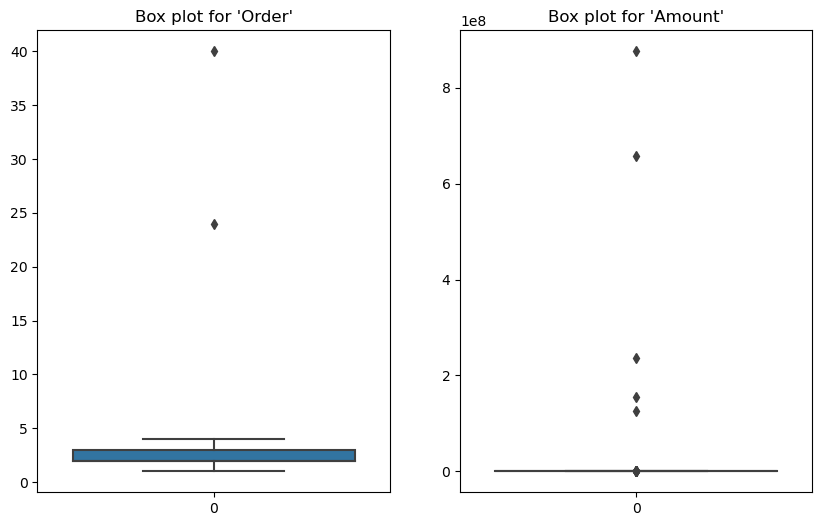

In [48]:
#visualization of outlier
fig,ax = plt.subplots(1,2,figsize = (10,6))
sns.boxplot(data = df['Orders'] , ax = ax[0])
ax[0].set_title("Box plot for 'Order'")

sns.boxplot(data = df['Amount'] , ax = ax[1])
ax[1].set_title("Box plot for 'Amount'")

#### Order

In [49]:
#Quartile
Q1_order = np.quantile(df['Orders'], 0.25)
Q3_order = np.quantile(df['Orders'], 0.75)
IQR_order = Q3_order - Q1_order
lower_limit_order = Q1_order - 1.5*IQR_order
upper_limit_order = Q3_order + 1.5*IQR_order

In [50]:
print(lower_limit_order)
print(upper_limit_order)

0.5
4.5


In [51]:
# Removing the outliers
df = df[(df['Orders'] > lower_limit_order) & (df['Orders'] < upper_limit_order)]
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1,Marraige_Status
0,1002903.0,Sanskriti,P00125942,F,26-35,28.0,0.0,Maharashtra,Western,Healthcare,Auto,1.0,23952.0,NaN,NaN,Unmarried
1,1000732.0,Kartik,P00110942,F,26-35,35.0,1.0,Andhra Pradesh,Southern,Govt,Auto,3.0,23934.0,NaN,NaN,Married
2,1001990.0,Bindu,P00118542,F,26-35,35.0,1.0,Uttar Pradesh,Central,Automobile,Auto,3.0,23924.0,NaN,NaN,Married
3,1001425.0,Sudevi,P00237842,M,0-17,16.0,0.0,Karnataka,Southern,Construction,Auto,2.0,23912.0,NaN,NaN,Unmarried
4,1000588.0,Joni,P00057942,M,26-35,28.0,1.0,Gujarat,Western,Food Processing,Auto,2.0,23877.0,NaN,NaN,Married


In [52]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount,Status,unnamed1
count,1.125200e+04,11252.000000,11252.000000,11252.000000,1.125200e+04,0.0,0.0
mean,1.011889e+06,35.423303,0.419836,2.488891,1.917000e+05,NaN,NaN
std,2.979871e+05,12.753743,0.493554,1.114844,1.073001e+07,NaN,NaN
min,1.000001e+06,12.000000,0.000000,1.000000,1.880000e+02,NaN,NaN
25%,1.001496e+06,27.000000,0.000000,2.000000,5.444750e+03,NaN,NaN
50%,1.003064e+06,33.000000,0.000000,2.000000,8.113000e+03,NaN,NaN
75%,1.004429e+06,43.000000,1.000000,3.000000,1.269900e+04,NaN,NaN
max,1.100505e+07,92.000000,1.000000,4.000000,8.760212e+08,NaN,NaN


In [53]:
# Quartile
Q1_amount = np.quantile(df['Amount'], 0.25)
Q3_amount = np.quantile(df['Amount'], 0.75)
IQR_amount = Q3_amount - Q1_amount
#IQR_order
lower_limit_amount = Q1_amount - 1.5*IQR_amount
upper_limit_amount = Q3_amount + 1.5*IQR_amount

print(lower_limit_amount)
print(upper_limit_amount)

-5436.625
23580.375


In [54]:
# Removing the outliers
df = df[(df['Amount'] > lower_limit_amount) & (df['Amount'] < upper_limit_amount)]
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1,Marraige_Status
18,1001883.0,Praneet,P00029842,M,26-35,54.0,1.0,Uttar Pradesh,Central,Hospitality,Auto,1.0,23568.0,NaN,NaN,Married
19,1001883.0,Praneet,P00029842,M,26-35,54.0,1.0,Uttar Pradesh,Central,Hospitality,Auto,1.0,23568.0,NaN,NaN,Married
20,1000113.0,Ellis,P00180642,F,26-35,19.0,1.0,Andhra Pradesh,Southern,Govt,Auto,4.0,23546.0,NaN,NaN,Married
21,1000416.0,Hrisheekesh,P00181842,F,26-35,46.0,1.0,Uttar Pradesh,Central,Banking,Auto,2.0,23525.0,NaN,NaN,Married
22,1005256.0,Grant,P00101742,F,26-35,30.0,0.0,Andhra Pradesh,Southern,IT Sector,Auto,1.0,23518.0,NaN,NaN,Unmarried


In [55]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount,Status,unnamed1
count,1.123400e+04,11234.000000,11234.000000,11234.000000,11234.000000,0.0,0.0
mean,1.007453e+06,35.433772,0.419708,2.489496,9452.764638,NaN,NaN
std,2.109026e+05,12.759432,0.493533,1.114845,5213.784648,NaN,NaN
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000,NaN,NaN
25%,1.001496e+06,27.000000,0.000000,2.000000,5443.000000,NaN,NaN
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.500000,NaN,NaN
75%,1.004429e+06,43.000000,1.000000,3.000000,12681.500000,NaN,NaN
max,1.100173e+07,92.000000,1.000000,4.000000,23568.000000,NaN,NaN


### Exploratory Data Analysis

#### Statistical Analysis 

In [56]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1,Marraige_Status
18,1001883.0,Praneet,P00029842,M,26-35,54.0,1.0,Uttar Pradesh,Central,Hospitality,Auto,1.0,23568.0,NaN,NaN,Married
19,1001883.0,Praneet,P00029842,M,26-35,54.0,1.0,Uttar Pradesh,Central,Hospitality,Auto,1.0,23568.0,NaN,NaN,Married
20,1000113.0,Ellis,P00180642,F,26-35,19.0,1.0,Andhra Pradesh,Southern,Govt,Auto,4.0,23546.0,NaN,NaN,Married
21,1000416.0,Hrisheekesh,P00181842,F,26-35,46.0,1.0,Uttar Pradesh,Central,Banking,Auto,2.0,23525.0,NaN,NaN,Married
22,1005256.0,Grant,P00101742,F,26-35,30.0,0.0,Andhra Pradesh,Southern,IT Sector,Auto,1.0,23518.0,NaN,NaN,Unmarried


In [57]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount,Status,unnamed1
count,1.123400e+04,11234.000000,11234.000000,11234.000000,11234.000000,0.0,0.0
mean,1.007453e+06,35.433772,0.419708,2.489496,9452.764638,NaN,NaN
std,2.109026e+05,12.759432,0.493533,1.114845,5213.784648,NaN,NaN
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000,NaN,NaN
25%,1.001496e+06,27.000000,0.000000,2.000000,5443.000000,NaN,NaN
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.500000,NaN,NaN
75%,1.004429e+06,43.000000,1.000000,3.000000,12681.500000,NaN,NaN
max,1.100173e+07,92.000000,1.000000,4.000000,23568.000000,NaN,NaN


### Data visualization

#### Gender Wise Ananlysis 

In [58]:
#plot data
data_gender_count = df.groupby(['Gender'], as_index = False)['Orders'].count()
print("Gender Wise order count \n", data_gender_count)
data_gender_amount = df.groupby(['Gender'], as_index = False)['Amount'].sum()
print("Gender Wise purchase power \n", data_gender_amount)

Gender Wise order count 
   Gender  Orders
0      F    7835
1      M    3399
Gender Wise purchase power 
   Gender       Amount
0      F  74422989.94
1      M  31769368.00


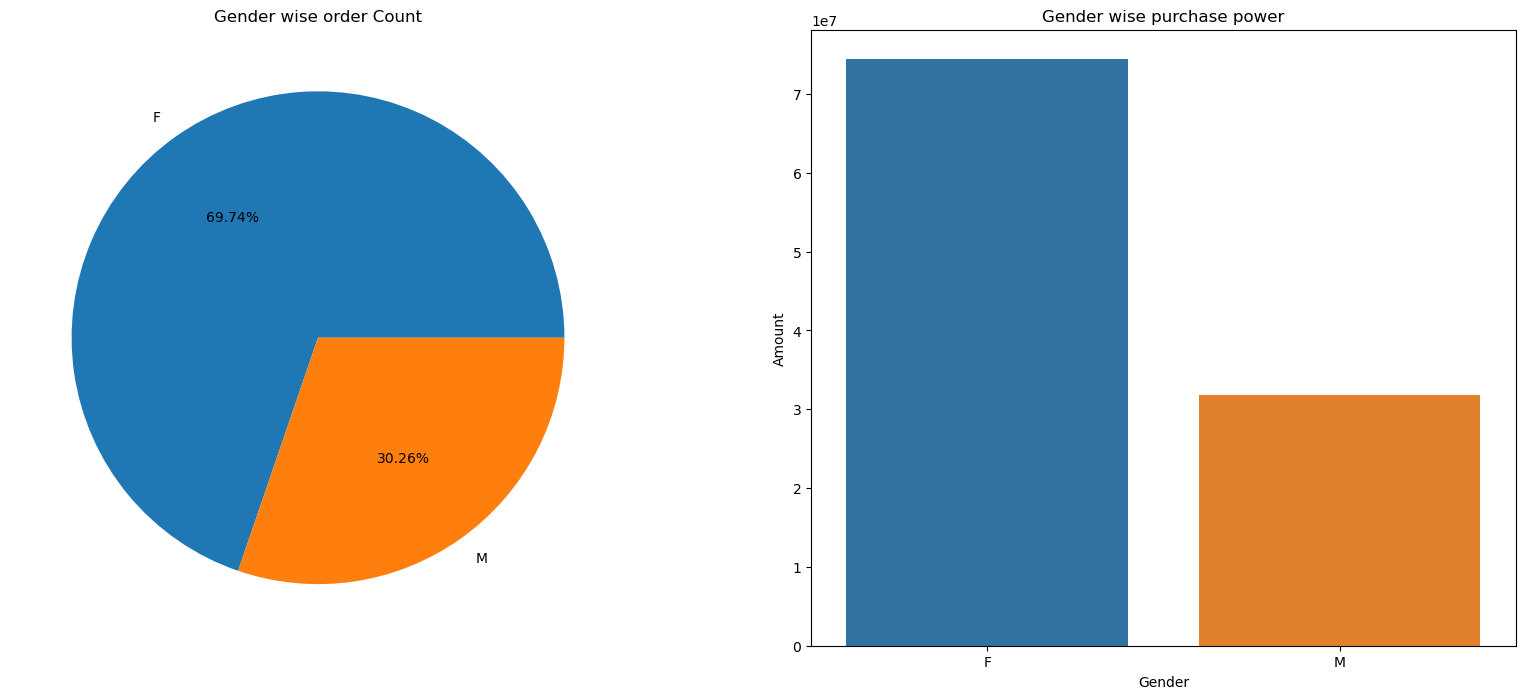

In [59]:
#plotting
fig,ax = plt.subplots(1,2, figsize = (20,8))
#pie chart
ax[0].pie(x = data_gender_count['Orders'],
         labels = data_gender_count['Gender'], autopct = "%1.2f%%")
ax[0].set_title("Gender wise order Count")

#bar chart
sns.barplot(x = 'Gender', y = 'Amount', data = data_gender_amount, ax = ax[1])
ax[1].set_title("Gender wise purchase power")
plt.show()

#### Conclustion 
Females generally places more order and their purchase power is also higher.

 #### marital status wise analysis  

In [60]:
data_marraige_status_amount = df.groupby(['Marraige_Status'], as_index = False)['Amount'].sum()
data_marraige_status_amount

,Marraige_Status,Amount
0,Married,44003938.00
1,Unmarried,62188419.94


In [61]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1,Marraige_Status
18,1001883.0,Praneet,P00029842,M,26-35,54.0,1.0,Uttar Pradesh,Central,Hospitality,Auto,1.0,23568.0,NaN,NaN,Married
19,1001883.0,Praneet,P00029842,M,26-35,54.0,1.0,Uttar Pradesh,Central,Hospitality,Auto,1.0,23568.0,NaN,NaN,Married
20,1000113.0,Ellis,P00180642,F,26-35,19.0,1.0,Andhra Pradesh,Southern,Govt,Auto,4.0,23546.0,NaN,NaN,Married
21,1000416.0,Hrisheekesh,P00181842,F,26-35,46.0,1.0,Uttar Pradesh,Central,Banking,Auto,2.0,23525.0,NaN,NaN,Married
22,1005256.0,Grant,P00101742,F,26-35,30.0,0.0,Andhra Pradesh,Southern,IT Sector,Auto,1.0,23518.0,NaN,NaN,Unmarried


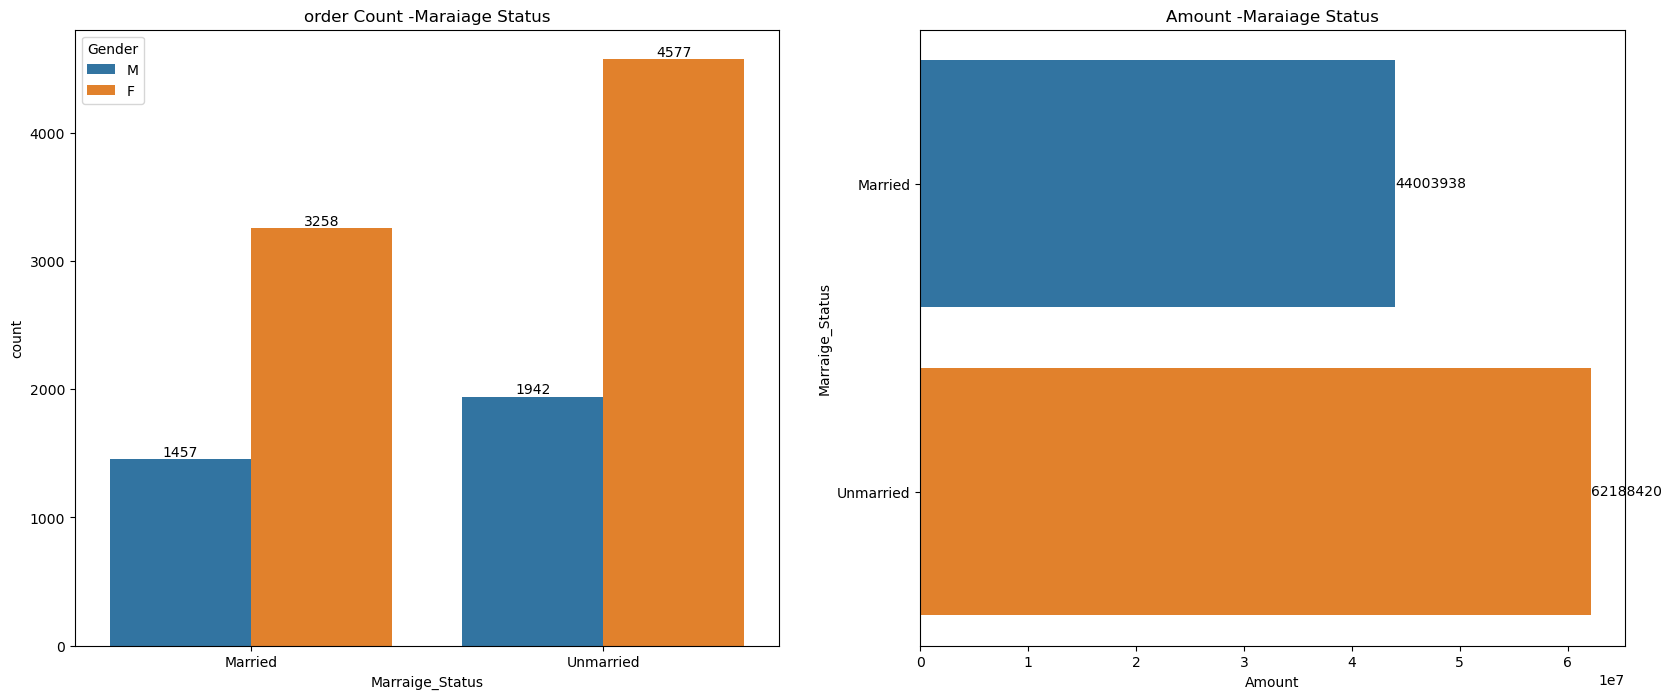

In [62]:
#plots
fig,ax = plt.subplots(1,2, figsize = (20,8))
#countplot
sns.countplot(x = 'Marraige_Status', hue = 'Gender', data = df, ax=ax[0])
ax[0].set_title("order Count -Maraiage Status")
#bar chart
sns.barplot(y = 'Marraige_Status', x = 'Amount', orient = 'h',
            data = data_marraige_status_amount, ax = ax[1])
ax[1].set_title("Amount -Maraiage Status")

# Add custom value labels to the countplot
for p in ax[0].patches:
    ax[0].annotate(f"{p.get_height():.0f}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

for p in ax[1].patches:
    ax[1].annotate(f"{p.get_width():.0f}", (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2.),
                   ha='left', va='center')    
plt.show()

#### conclusion
Unmarried female places more order , than married female and then unmarried male

#### Age Group wise Analysis 

In [63]:
data_Age_Group_amount = df.groupby(['Age Group'], as_index = False)['Amount'].sum()
data_Age_Group_amount

,Age Group,Amount
0,0-17,2696529.00
1,18-25,17032196.00
2,26-35,42603794.95
3,36-45,22234332.99
4,46-50,9245595.00
5,51-55,8278320.00
6,55+,4101590.00


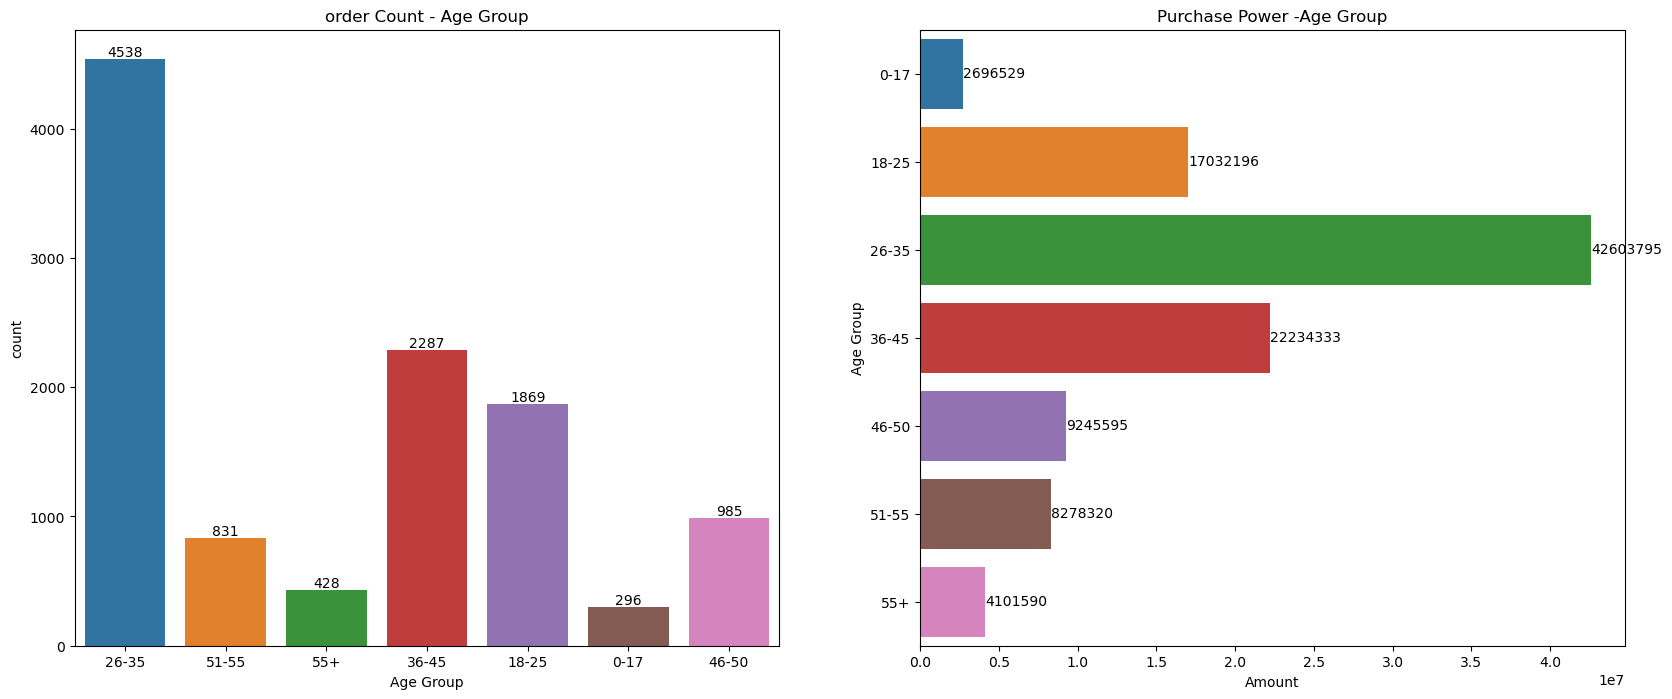

In [64]:
#plots
fig,ax = plt.subplots(1,2, figsize = (20,8))
#countplot
sns.countplot(x = 'Age Group', data = df, ax=ax[0])
ax[0].set_title("order Count - Age Group")
#bar chart
sns.barplot(y = 'Age Group', x = 'Amount', orient = 'h',
            data = data_Age_Group_amount, ax = ax[1])
ax[1].set_title("Purchase Power -Age Group")

# Add custom value labels to the countplot
for p in ax[0].patches:
    ax[0].annotate(f"{p.get_height():.0f}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

for p in ax[1].patches:
    ax[1].annotate(f"{p.get_width():.0f}", (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2.),
                   ha='left', va='center')    
plt.show()

####  Conclution


### product Category wise analysis 

In [65]:
data_product_category_count = df.groupby(['Product_Category'], as_index = False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
data_product_category_count

,Product_Category,Orders
3,Clothing & Apparel,6627.0
6,Food,6110.0
5,Electronics & Gadgets,5208.0
7,Footwear & Shoes,2701.0
11,Household items,1331.0
1,Beauty,1086.0
9,Games & Toys,940.0
8,Furniture,895.0
14,Sports Products,870.0
13,Pet Care,536.0


In [66]:
data_product_category_amount = df.groupby(['Product_Category'], as_index = False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
data_product_category_amount

,Product_Category,Amount
6,Food,33933883.50
3,Clothing & Apparel,16484472.00
7,Footwear & Shoes,16009057.45
5,Electronics & Gadgets,15607657.00
8,Furniture,5481325.99
9,Games & Toys,4331694.00
14,Sports Products,3635933.00
1,Beauty,1959484.00
0,Auto,1624503.00
11,Household items,1569337.00


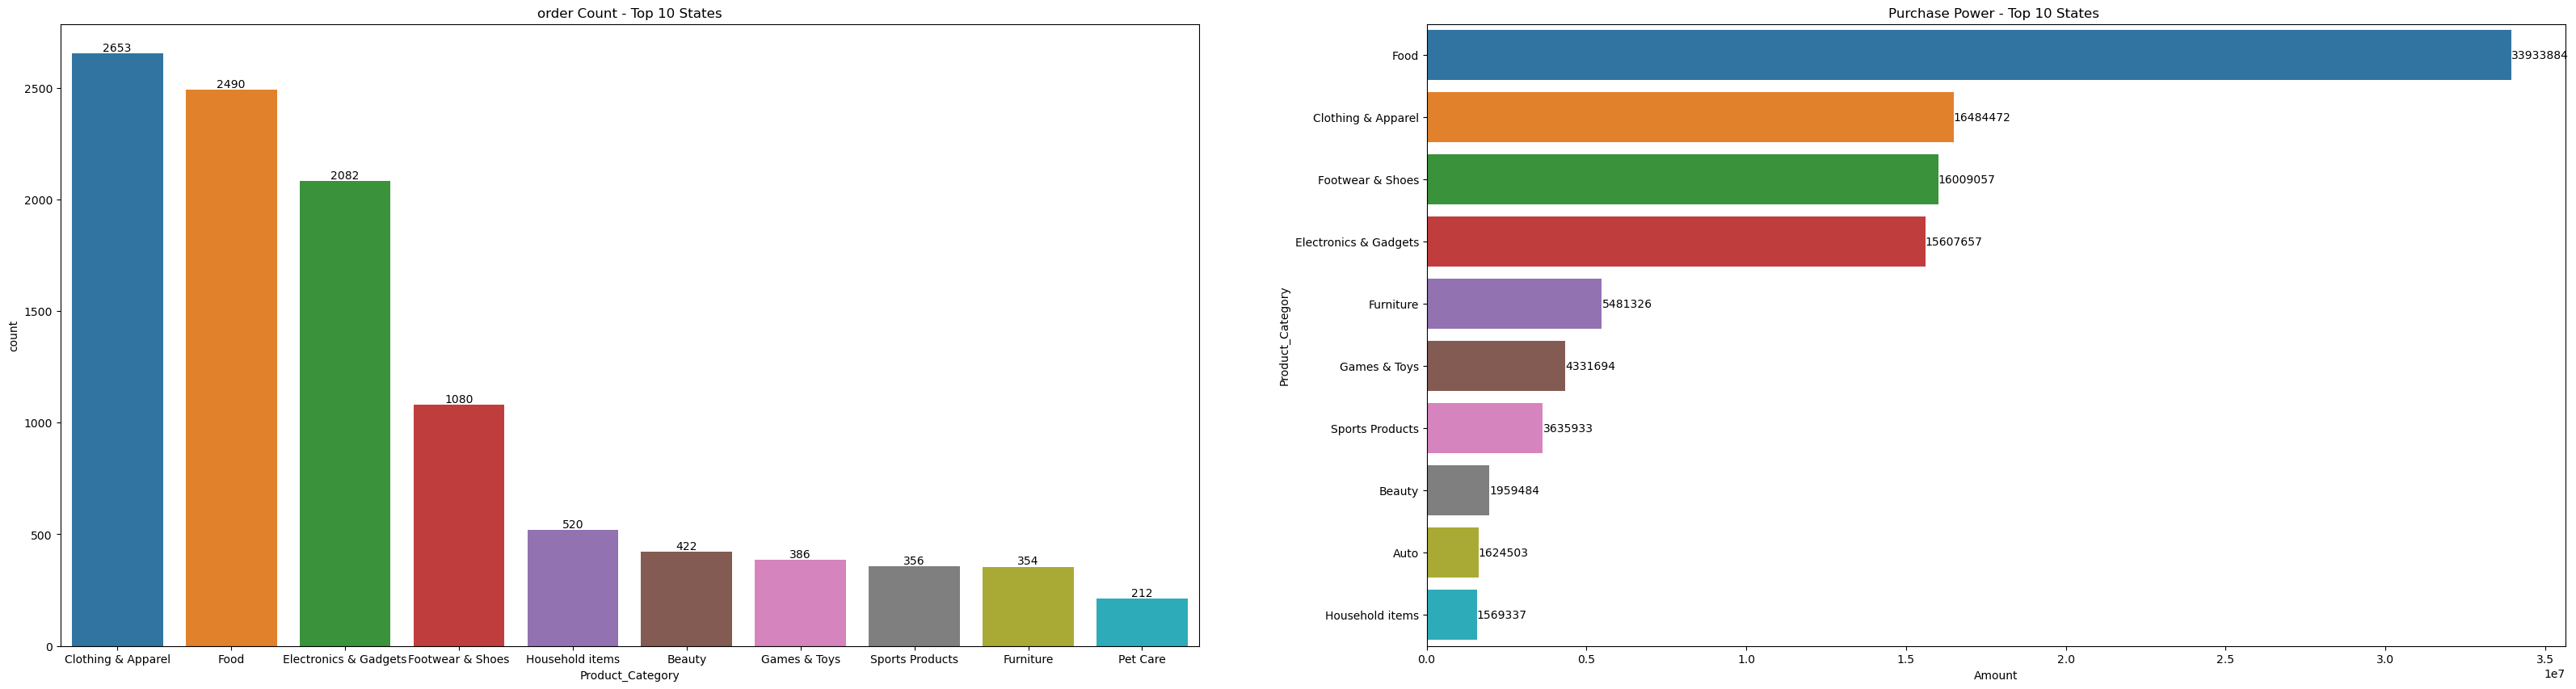

In [67]:
#Top 10 states of Product Category
#plots
fig,ax = plt.subplots(1,2, figsize = (40,10))
#countplot
sns.countplot(x = 'Product_Category',
              data = df, ax=ax[0],order=df['Product_Category'].value_counts('Product_Category').iloc[:10].index)
ax[0].set_title("order Count - Top 10 States")
#bar chart
sns.barplot(y = 'Product_Category', x = 'Amount', orient = 'h',
            data = data_product_category_amount, ax = ax[1])
ax[1].set_title("Purchase Power - Top 10 States ")

# Add custom value labels to the countplot
for p in ax[0].patches:
    ax[0].annotate(f"{p.get_height():.0f}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

for p in ax[1].patches:
    ax[1].annotate(f"{p.get_width():.0f}", (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2.),
                   ha='left', va='center')    
plt.show()

##### conclution

### State wise analysis

In [68]:
data_state_count = df.groupby(['State'], as_index = False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
data_state_count

,State,Orders
14,Uttar Pradesh,4805.0
10,Maharashtra,3799.0
7,Karnataka,3266.0
2,Delhi,2728.0
9,Madhya Pradesh,2253.0
0,Andhra Pradesh,2036.0
5,Himachal Pradesh,1567.0
8,Kerala,1137.0
4,Haryana,1104.0
3,Gujarat,1065.0


In [69]:
data_state_amount = df.groupby(['State'], as_index = False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
data_state_amount

,State,Amount
14,Uttar Pradesh,19360148.00
10,Maharashtra,14400762.00
7,Karnataka,13705829.00
2,Delhi,11554343.95
9,Madhya Pradesh,8100944.00
0,Andhra Pradesh,7894002.00
5,Himachal Pradesh,4939491.00
4,Haryana,4196308.00
1,Bihar,4035457.00
3,Gujarat,3935078.00


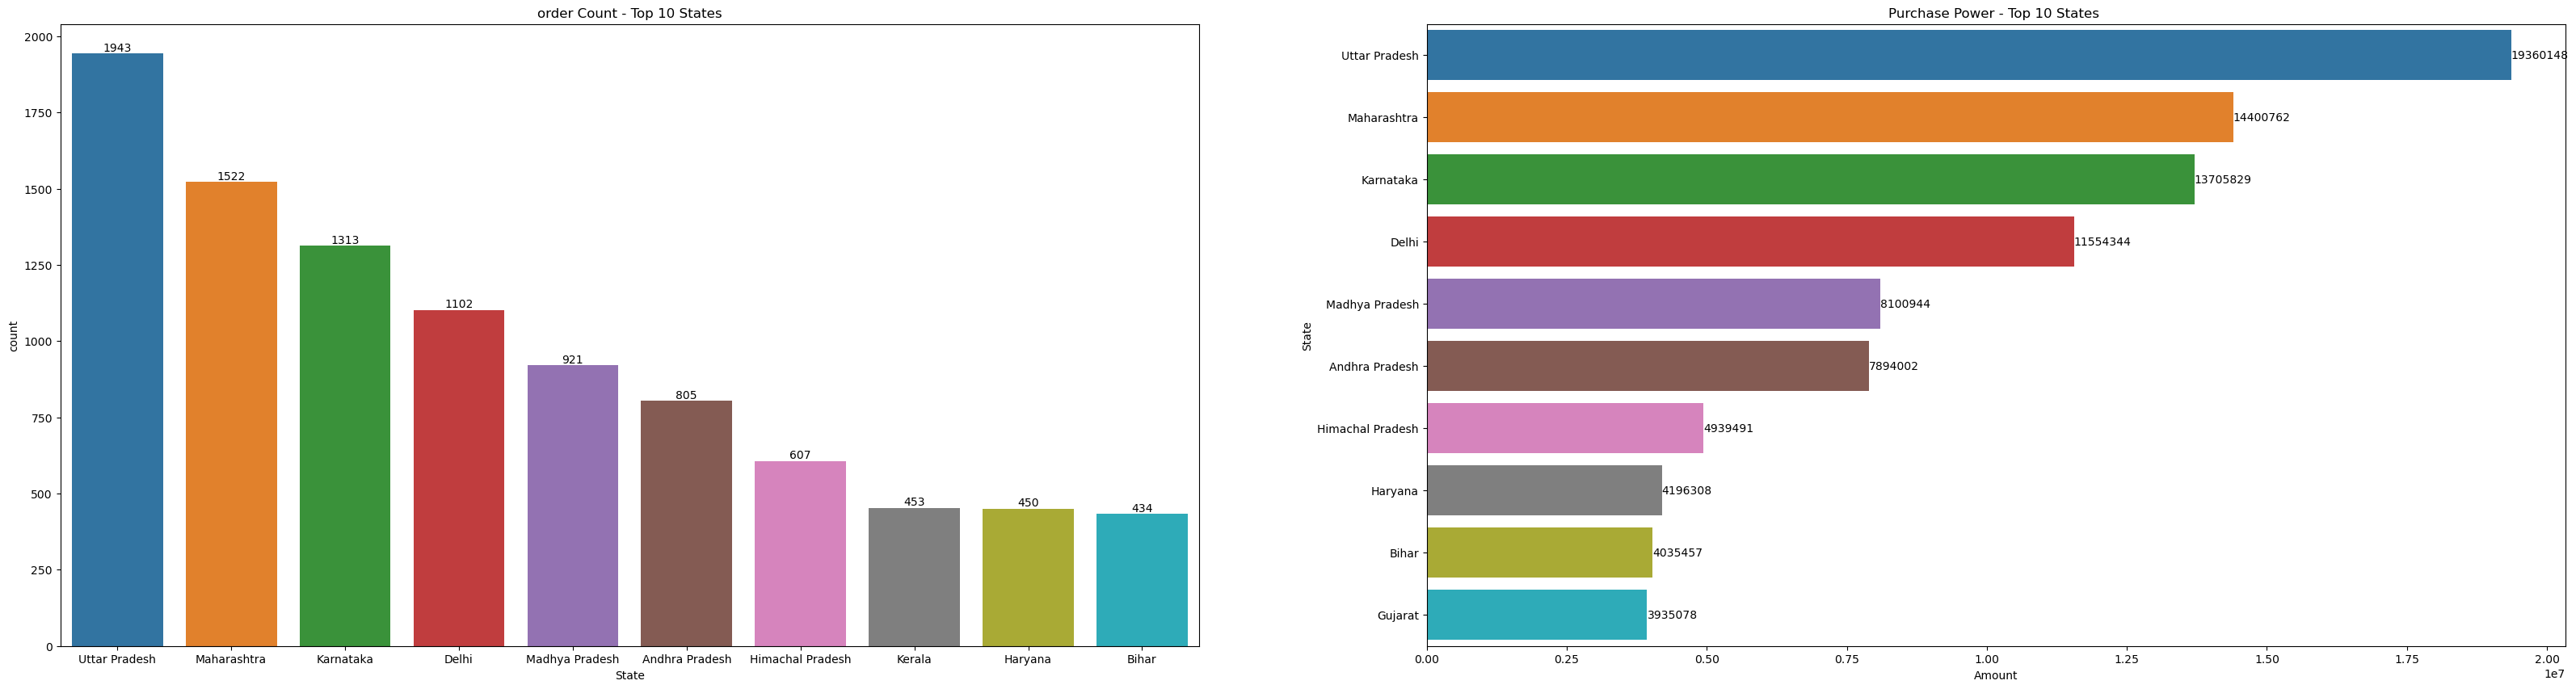

In [70]:
#Top 10 states of State
#plots
fig,ax = plt.subplots(1,2, figsize = (40,10))
#countplot
sns.countplot(x = 'State',
              data = df, ax=ax[0],order=df['State'].value_counts('State').iloc[:10].index)
ax[0].set_title("order Count - Top 10 States")
#bar chart
sns.barplot(y = 'State', x = 'Amount', orient = 'h',
            data = data_state_amount, ax = ax[1])
ax[1].set_title("Purchase Power - Top 10 States ")
# Add custom value labels to the countplot
for p in ax[0].patches:
    ax[0].annotate(f"{p.get_height():.0f}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

for p in ax[1].patches:
    ax[1].annotate(f"{p.get_width():.0f}", (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2.),
                   ha='left', va='center')    
plt.show()

### Product id wise analysis

In [71]:
data_product_id_count = df.groupby(['Product_ID'], as_index = False)['Product_ID'].sum().sort_values(by='Product_ID', ascending=False).head(10)
data_product_id_count

,Product_ID
2348,P0099742
2347,P0099442P0099442P0099442P0099442
2346,P0099342P0099342P0099342P0099342P0099342P00993...
2345,P0099242P0099242P0099242P0099242P0099242P00992...
2344,P0099042P0099042P0099042P0099042P0099042P0099042
2343,P0098842
2342,P0098742
2341,P0098442
2340,P0098342P0098342P0098342P0098342P0098342
2339,P0098242P0098242P0098242P0098242P0098242P0098242


In [72]:
data_product_id_amount = df.groupby(['Product_ID'], as_index = False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
data_product_id_amount

,Product_ID,Amount
1678,P00265242,561461.0
1146,P00184942,401816.0
644,P00110942,400899.0
396,P00059442,359230.0
654,P00112142,341020.0
1503,P00237542,322363.0
388,P00058042,307040.0
642,P00110742,294548.0
643,P00110842,290661.0
313,P00046742,287643.0


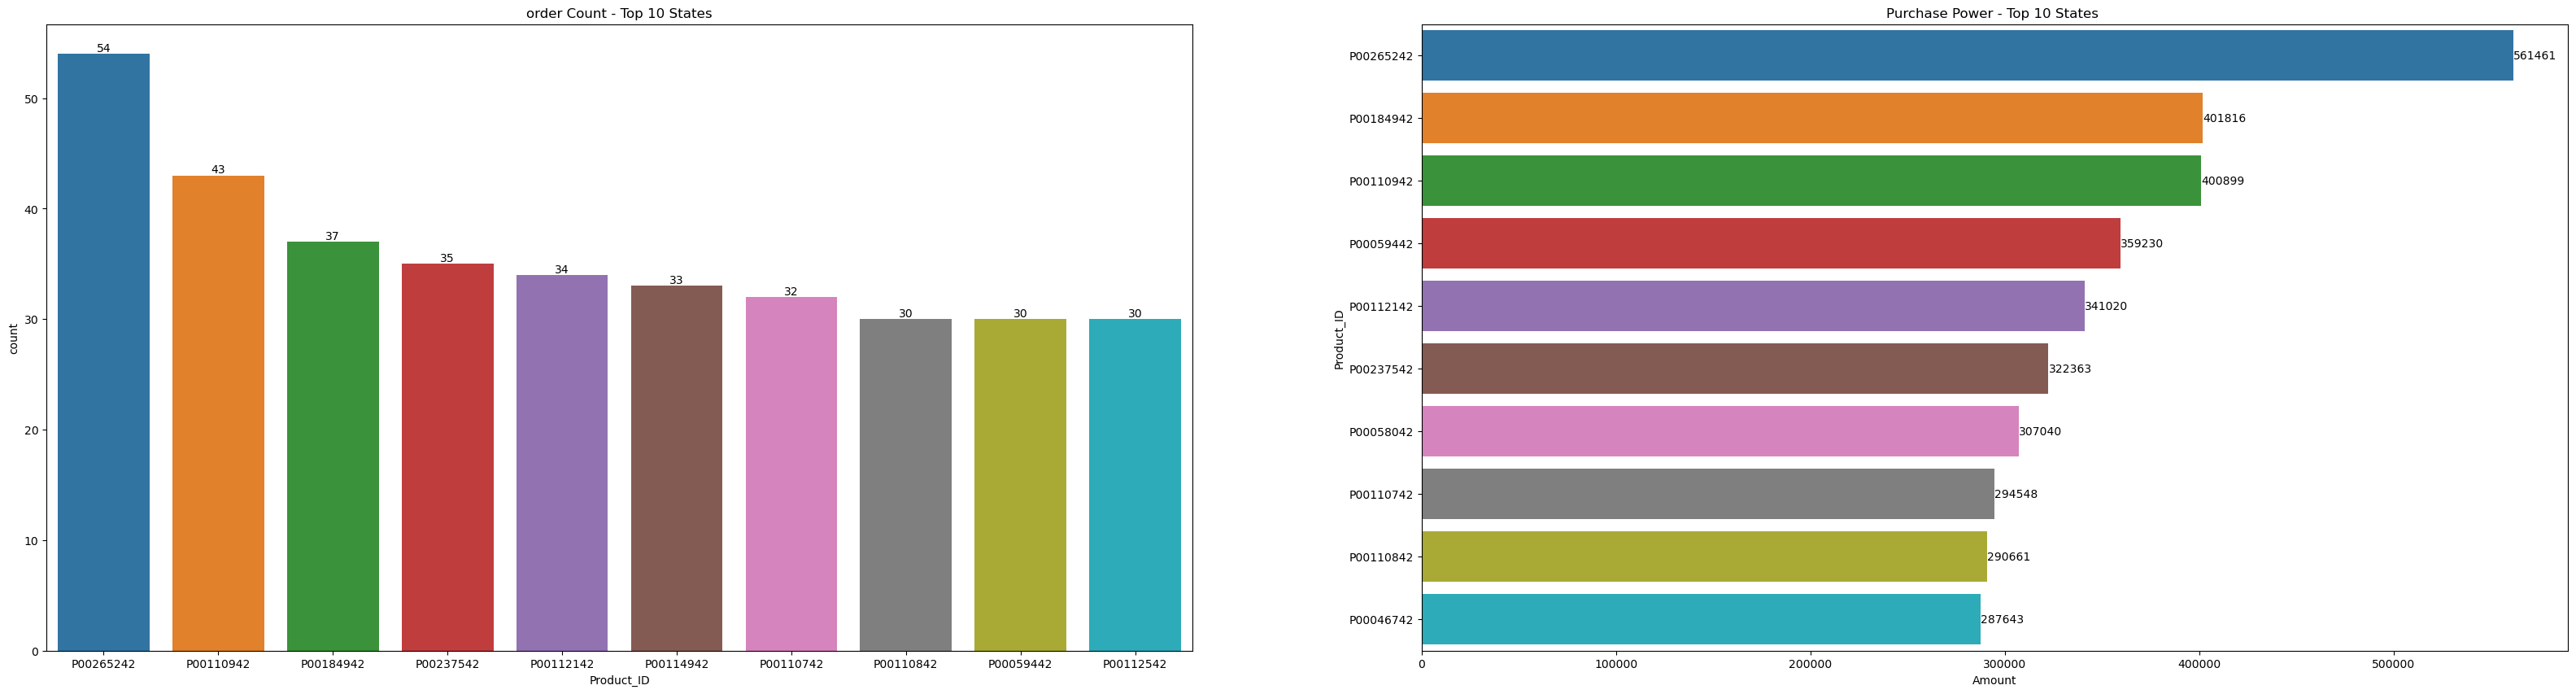

In [73]:
#Top 10 states of Product id
#plots
fig,ax = plt.subplots(1,2, figsize = (40,10))
#countplot
sns.countplot(x = 'Product_ID',
              data = df, ax=ax[0],order=df['Product_ID'].value_counts('Product_ID').iloc[:10].index)
ax[0].set_title("order Count - Top 10 States")#bar chart
sns.barplot(y = 'Product_ID', x = 'Amount', orient = 'h',
            data = data_product_id_amount, ax = ax[1])
ax[1].set_title("Purchase Power - Top 10 States ")
# Add custom value labels to the countplot
for p in ax[0].patches:
    ax[0].annotate(f"{p.get_height():.0f}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

for p in ax[1].patches:
    ax[1].annotate(f"{p.get_width():.0f}", (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2.),
                   ha='left', va='center')    
plt.show()

### Occoupation wise analysis

In [74]:
data_occupation_count = df.groupby(['Occupation'], as_index = False)['Occupation'].sum().sort_values(by='Occupation', ascending=False).head(10)
data_occupation_count

,Occupation
14,TextileTextileTextileTextileTextileTextileText...
13,RetailRetailRetailRetailRetailRetailRetailReta...
12,MediaMediaMediaMediaMediaMediaMediaMediaMediaM...
11,LawyerLawyerLawyerLawyerLawyerLawyerLawyerLawy...
10,IT SectorIT SectorIT SectorIT SectorIT SectorI...
9,HospitalityHospitalityHospitalityHospitalityHo...
8,HealthcareHealthcareHealthcareHealthcareHealth...
7,GovtGovtGovtGovtGovtGovtGovtGovtGovtGovtGovtGo...
6,Food ProcessingFood ProcessingFood ProcessingF...
5,ConstructionConstructionConstructionConstructi...


In [75]:
data_occupation_amount = df.groupby(['Occupation'], as_index = False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
data_occupation_amount

,Occupation,Amount
10,IT Sector,14902488.00
8,Healthcare,12989061.49
2,Aviation,12596751.00
3,Banking,10767299.45
7,Govt,8425182.00
9,Hospitality,6402793.00
12,Media,6291535.00
1,Automobile,5362757.00
4,Chemical,5297100.00
11,Lawyer,4977574.00


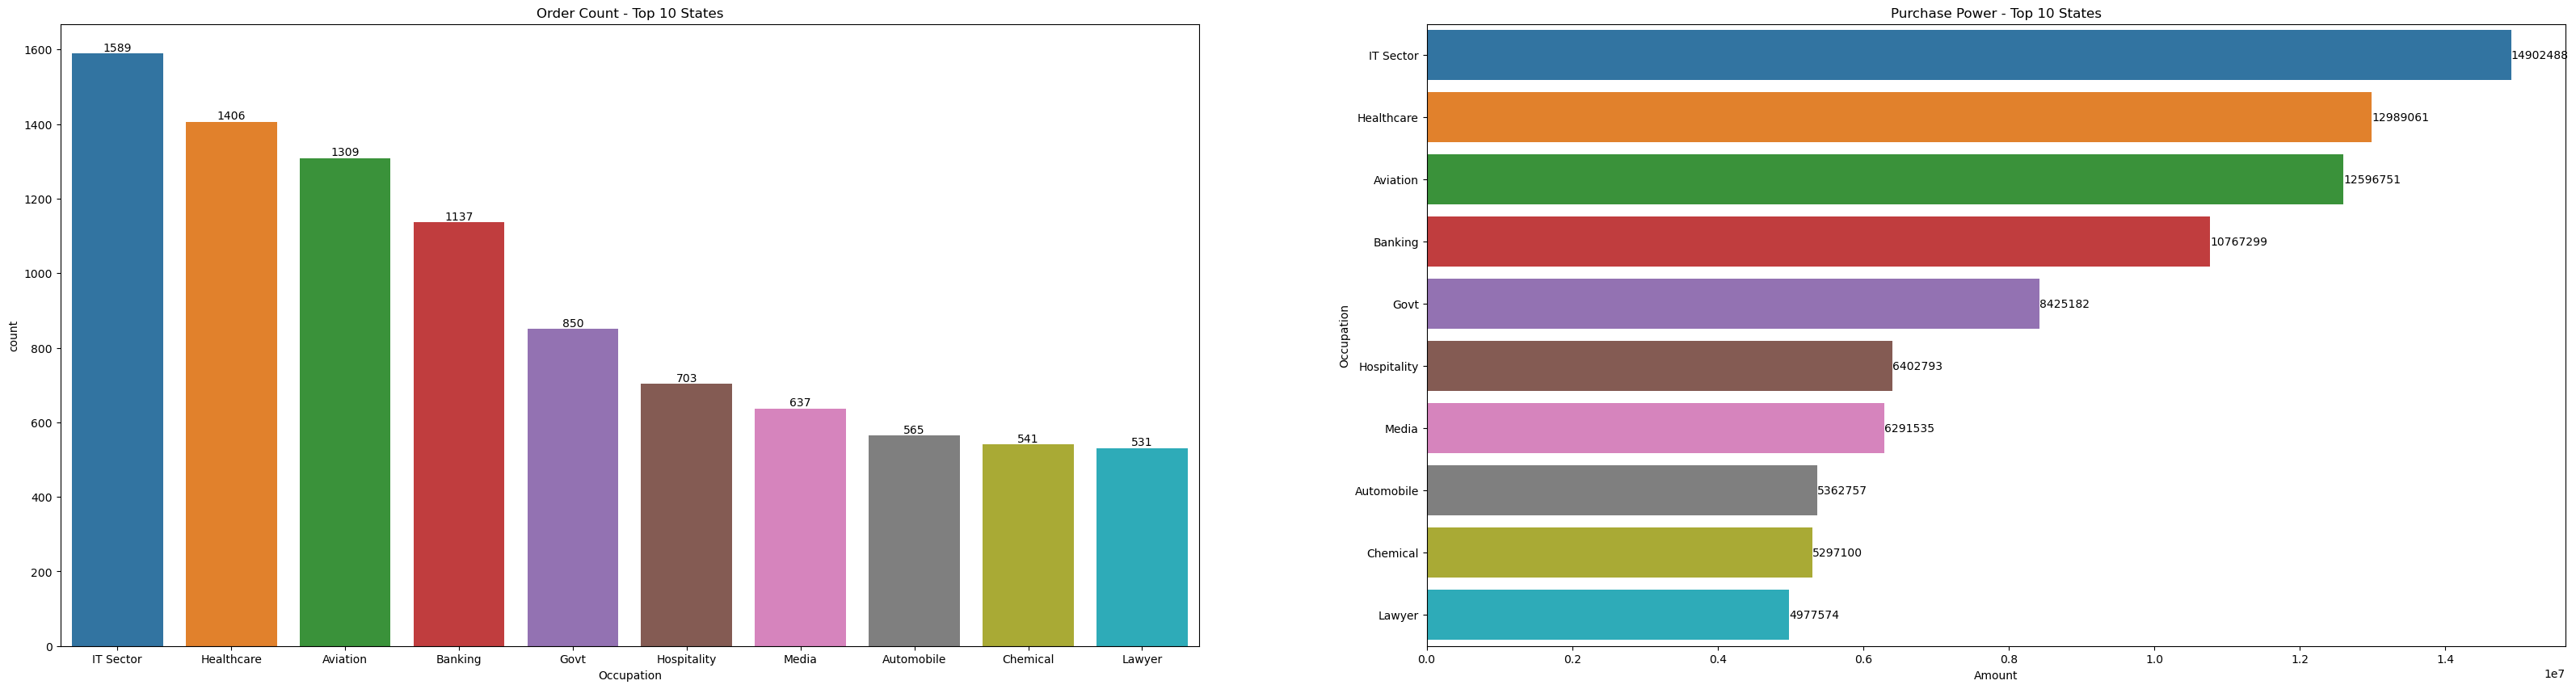

In [76]:
#Top 10 States of Occupation
fig, ax = plt.subplots(1, 2, figsize=(40, 10))

# Left plot: Countplot
sns.countplot(x='Occupation', data=df, ax=ax[0], order=df['Occupation'].value_counts().iloc[:10].index)
ax[0].set_title("Order Count - Top 10 States")
# Right plot: Bar chart
sns.barplot(y='Occupation', x='Amount', orient='h', data=data_occupation_amount, ax=ax[1])
ax[1].set_title("Purchase Power - Top 10 States")

# Add custom value labels to the countplot
for p in ax[0].patches:
    ax[0].annotate(f"{p.get_height():.0f}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

for p in ax[1].patches:
    ax[1].annotate(f"{p.get_width():.0f}", (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2.),
                   ha='left', va='center')
plt.show()
